In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import log_loss

In [2]:
train_targets_scored = pd.read_csv('data/raw/train_targets_scored.csv')
target_cols = train_targets_scored.drop('sig_id', axis=1).columns.values.tolist()

In [3]:
base = pd.read_csv('oof/3lay_1024_20.0_quantile_250.csv')

base.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0.002368,0.001301,0.001442,0.009393,0.042394,0.007626,0.004253,0.004632,0.000619,...,0.000879,0.000842,0.002270,0.002107,0.001432,0.000719,0.000816,0.002390,0.000707,0.001937
1,id_000779bfc,0.001086,0.001397,0.002339,0.029484,0.023020,0.008127,0.005651,0.009725,0.000994,...,0.001333,0.002311,0.004412,0.004153,0.003121,0.000937,0.002224,0.003665,0.001241,0.002908
2,id_000a6266a,0.002061,0.001450,0.000964,0.002846,0.005020,0.003191,0.002310,0.005986,0.001167,...,0.000659,0.001104,0.001891,0.001496,0.012088,0.000940,0.095357,0.001164,0.000803,0.001853
3,id_0015fd391,0.000639,0.001410,0.002596,0.008176,0.009659,0.002581,0.001855,0.002097,0.000613,...,0.000976,0.002213,0.002612,0.038952,0.002415,0.001051,0.001212,0.001364,0.000603,0.000998
4,id_001626bd3,0.001317,0.001986,0.003314,0.007543,0.006242,0.003661,0.003868,0.002857,0.001757,...,0.001340,0.001566,0.002383,0.001635,0.002173,0.001275,0.002911,0.002812,0.001092,0.004310


In [4]:
best = pd.read_csv('oof/4lay_600_15.0_quantile_500.csv')

best.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0.002455,0.001541,0.001200,0.010274,0.032068,0.008288,0.002568,0.006229,0.000587,...,0.000733,0.000976,0.002551,0.002087,0.001636,0.000719,0.001286,0.002124,0.000827,0.001882
1,id_000779bfc,0.000914,0.001036,0.002361,0.031073,0.022979,0.006206,0.004777,0.008534,0.000761,...,0.001178,0.001440,0.003200,0.001539,0.002407,0.000738,0.001129,0.003464,0.001562,0.003314
2,id_000a6266a,0.002909,0.001870,0.000965,0.001624,0.003418,0.002593,0.002221,0.006407,0.002127,...,0.000580,0.000770,0.002268,0.003020,0.026834,0.000924,0.438611,0.001110,0.000483,0.001953
3,id_0015fd391,0.000649,0.001433,0.002222,0.006499,0.005817,0.003107,0.001776,0.003504,0.000717,...,0.000933,0.004383,0.002985,0.060807,0.002457,0.001185,0.001114,0.001431,0.000666,0.000985
4,id_001626bd3,0.001541,0.001443,0.001995,0.013079,0.008150,0.003869,0.003925,0.002325,0.001181,...,0.000900,0.002191,0.002841,0.002548,0.001443,0.001149,0.001018,0.002345,0.000677,0.002303


In [5]:
tot = pd.merge(base, best, on='sig_id')

assert tot.shape[0] == base.shape[0]
assert tot.shape[0] == best.shape[0]

tot.head()

,sig_id,5-alpha_reductase_inhibitor_x,11-beta-hsd1_inhibitor_x,acat_inhibitor_x,acetylcholine_receptor_agonist_x,acetylcholine_receptor_antagonist_x,acetylcholinesterase_inhibitor_x,adenosine_receptor_agonist_x,adenosine_receptor_antagonist_x,adenylyl_cyclase_activator_x,...,tropomyosin_receptor_kinase_inhibitor_y,trpv_agonist_y,trpv_antagonist_y,tubulin_inhibitor_y,tyrosine_kinase_inhibitor_y,ubiquitin_specific_protease_inhibitor_y,vegfr_inhibitor_y,vitamin_b_y,vitamin_d_receptor_agonist_y,wnt_inhibitor_y
0,id_000644bb2,0.002368,0.001301,0.001442,0.009393,0.042394,0.007626,0.004253,0.004632,0.000619,...,0.000733,0.000976,0.002551,0.002087,0.001636,0.000719,0.001286,0.002124,0.000827,0.001882
1,id_000779bfc,0.001086,0.001397,0.002339,0.029484,0.023020,0.008127,0.005651,0.009725,0.000994,...,0.001178,0.001440,0.003200,0.001539,0.002407,0.000738,0.001129,0.003464,0.001562,0.003314
2,id_000a6266a,0.002061,0.001450,0.000964,0.002846,0.005020,0.003191,0.002310,0.005986,0.001167,...,0.000580,0.000770,0.002268,0.003020,0.026834,0.000924,0.438611,0.001110,0.000483,0.001953
3,id_0015fd391,0.000639,0.001410,0.002596,0.008176,0.009659,0.002581,0.001855,0.002097,0.000613,...,0.000933,0.004383,0.002985,0.060807,0.002457,0.001185,0.001114,0.001431,0.000666,0.000985
4,id_001626bd3,0.001317,0.001986,0.003314,0.007543,0.006242,0.003661,0.003868,0.002857,0.001757,...,0.000900,0.002191,0.002841,0.002548,0.001443,0.001149,0.001018,0.002345,0.000677,0.002303


In [6]:
def make_blend(weight, tot):

    res = tot[['sig_id']].copy()

    for col in target_cols:
        res[col] = weight * tot[f'{col}_x'] + (1 - weight) * tot[f'{col}_y']

    valid_results = train_targets_scored.drop(columns=target_cols).merge(res[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

    y_true = train_targets_scored[target_cols].values
    y_pred = valid_results[target_cols].values

    score = 0
    for i in range(len(target_cols)):
        score_ = log_loss(y_true[:, i], y_pred[:, i])
        score += score_ / len(target_cols)
    
    return score*10000000

In [7]:
vals = np.arange(0.1, 1, 0.1)
res = []

for val in vals:
    res.append(make_blend(val, tot))
    
summary = pd.DataFrame({'weight': vals, 'score': res})

summary['score'] = summary['score'].astype('float64')

summary

,weight,score
0,0.1,146389.613373
1,0.2,146178.646623
2,0.3,146022.951611
3,0.4,145917.280596
4,0.5,145859.379918
5,0.6,145849.042933
6,0.7,145887.933706
7,0.8,145979.937191
8,0.9,146132.335787


<AxesSubplot:xlabel='weight'>

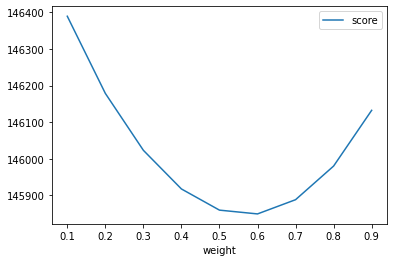

In [8]:
summary.plot(x='weight')